We're going to use this notebook to simulate data sets we'll use moving forward. Our analyses will examine two major types of tests: parametric and permutative for categorical and continous data. The parameters for each simulation will be selected at random from a set of limits.

<table>
<tr>
<th></th>
<th>Categorical</th>
<th>Continous</th>
</tr>
<tr>
<th>Parametric</th>
<td>One sample T test<br>Two Sample T test<br>One way Analysis of Variance</td>
<td>Linear correlation</td>
</tr>
<tr>
<th>Permutative</th>
<td>PERMANOVA</td>
<td>Mantel</td>
</tr>
</table>

In [1]:
import os
import pickle
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import skbio
import seaborn as sn

import emp_power.simulate as sim

% matplotlib inline
sn.set_style('ticks')

Let's also set this up to ignore certain warnings that appear due to dependent packages.

In [2]:
warnings.filterwarnings('ignore')

# Setting up the simulations

We'll set a random seed so the simulation results are consistent.

In [3]:
np.random.seed(25) 

The simulations will be saved in a directory under the current on called simulations. You can change this directory, but if you choose to do so, you'll need to update the directory in subsequent notebooks.

In [4]:
sim_location = './simulations/data/'
if not os.path.exists(sim_location):
    os.makedirs(sim_location)

We'll perform 100 simulations, and we'll track the information about the simulation in a dictionary called distribution.

In [5]:
num_rounds = 100
distributions = {}

## Helper Functions

We'll define a helper function which will allow us to easily retrieve functions associated with the simulation.

In [6]:
def retrieve_test(simulation_type):
    """The simulation function, test, and simulation parameters"""
    simulation = distributions[simulation_type]['function']
    test = distributions[simulation_type]['test']
    kwargs = distributions[simulation_type]['kwargs']
    
    return simulation, test, kwargs

We'll also define a function which will produce a pretty plot associated with the distribution.

In [7]:
def clean_up_axis(ax):
    """Formats the axis"""
    ax.set_yticks([])
    ax.set_yticklabels('')
    ax.set_xticklabels('')
    
    sn.despine(left=True, right=True, top=True, offset=10)

# Categorical Tests

## One Sample T test

We'll start by simulating data for a one sample t test. This test checks an observation is drawn from a sample. We are testing the alternatively hypotheses,

$\begin{matrix}
\textbf{H}_{0} & x = \bar{x} \\
\textbf{H}_{1} & x \neq \bar{x}\\
\end{matrix} \tag{2.1}$

It is assumed the sample is aspmotically normal.

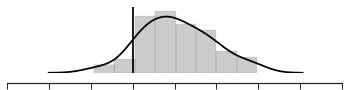

In [8]:
data = sim.simulate_ttest_1(mu_lim=[5, 6], 
                            sigma_lim=[4, 6], 
                            count_lim=[100, 101])
ax = plt.subplot(3, 1, 1)
sn.distplot(data[1], ax=ax, color='k', hist_kws={'alpha': 0.2})
ylim = ax.get_ylim()
ax.plot([0, 0], [0, 0.125], 'k-')
ax.set_ylim(ylim)
clean_up_axis(ax)

We'll simulate the data using a random normal distribution. The means for the distribution will be between 5 and 10, the standard deviations between 5 and 8, and the sample size between 60 and 100 observations.

In [9]:
distributions['ttest_1'] = {'function': sim.simulate_ttest_1,
                            'test': lambda x: scipy.stats.ttest_1samp(*x, 0),
                            'kwargs': {'mu_lim': [2, 10],
                                       'sigma_lim': [5, 8],
                                       'count_lim': [60, 100]}
                            }

## Two Sample Independent T test

We'll also simulate data for a two sample T test.

The case II t test is a test for two independent samples, to determine if the samples are drawn from different distributions.

$\begin{matrix}
\textbf{H}_{0} & \bar{x}_{1} = \bar{x}_{2} \\
\textbf{H}_{1} & \bar{x}_{1} \neq \bar{x}_{2}\\
\end{matrix} \tag{3.1}$

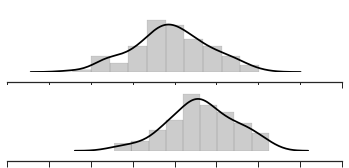

In [10]:
data = sim.simulate_ttest_ind(mu_lim=[0, 6], sigma_lim=[4, 6], count_lim=[100, 101])

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2, sharey=ax1, sharex=ax1)
sn.distplot(data[1][0], ax=ax1, color='k', hist_kws={'alpha': 0.2})
sn.distplot(data[1][1], ax=ax2, color='k', hist_kws={'alpha': 0.2})

ax1.set_ylim([0, 0.125])
ax2.set_ylim([0, 0.125])

clean_up_axis(ax1)
clean_up_axis(ax2)

We'll set up simulations with means between 0 and 10, with standard deviations between 5 and 15, and sample sizes between 60 and 100. The simulated distributions will have the same number of observations per sample, although this will vary between simulations.

In [11]:
distributions['ttest_ind'] = {'function': sim.simulate_ttest_ind,
                              'test': lambda x: scipy.stats.ttest_ind(*samples),
                              'kwargs': {'mu_lim': [0, 10],
                                         'sigma_lim': [5, 15],
                                         'count_lim': [60, 100]}
                              }

## One way ANOVA

A one-way Analysis of Variance (ANOVA) is typically  used to compare a set of multiple distributions ($n \geq 3$), to determine if one or more means are different. 

$\begin{matrix}
\textbf{H}_{0} & \bar{x}_{1} = \bar{x}_{2} = ... \bar{x}_{k} & \\
\textbf{H}_{1} & \bar{x}_{i} \neq \bar{x}_{j} & \exists i,j \epsilon [1, k], i \neq j
\end{matrix} \tag{4.2}$

We'll once again simulate normal distributions, to compare the data.

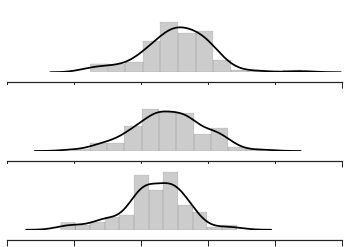

In [12]:
data = sim.simulate_anova(mu_lim=[0, 6], sigma_lim=[4, 6], count_lim=[100, 101], num_pops=3)

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2, sharey=ax1, sharex=ax1)
ax3 = plt.subplot(3, 1, 3, sharex=ax1, sharey=ax1)
sn.distplot(data[1][0], ax=ax1, color='k', hist_kws={'alpha': 0.2})
sn.distplot(data[1][1], ax=ax2, color='k', hist_kws={'alpha': 0.2})
sn.distplot(data[1][2], ax=ax3, color='k', hist_kws={'alpha': 0.2})

clean_up_axis(ax1)
clean_up_axis(ax2)
clean_up_axis(ax3)

We'll simulate two sets of distributions for ANOVA: a 3 sample and an 8 sample ANOVA. In both cases, we'll have means between 0 and 10, standard deviations between 5 and 15, and we'll once again have between 60 and 100 observations per sample, although the samples will be the same size.

In [13]:
distributions['anova_3'] = {'function': sim.simulate_anova,
                            'test': lambda x: scipy.stats.f_oneway(*x),
                            'kwargs': {'mu_lim': [0, 10],
                                       'sigma_lim': [5, 15],
                                       'count_lim': [60, 100],
                                       'num_pops': 3}
                            }
distributions['anova_8'] = {'function': sim.simulate_anova,
                            'test': lambda x: scipy.stats.f_oneway(*x),
                            'kwargs': {'mu_lim': [0, 10],
                                       'sigma_lim': [5, 15],
                                       'count_lim': [60, 100],
                                       'num_pops': 8}
                            }

## PERMANOVA on distance matrix

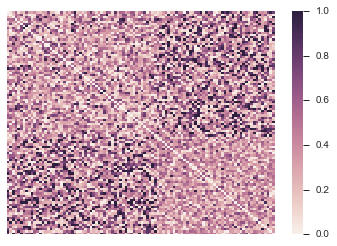

In [14]:
dm = sim.simulate_permanova(num_samples=100, 
                            wdist=[0, 0.4], 
                            wspread=[0.1, 0.4],
                            bdist=[0.25, 0.75],
                            bspread=[0.1, 0.6],
                           )[1][0]
ax = plt.axes()
sn.heatmap(dm.data, ax=ax)
ax.set_yticks([])
yt = ax.set_xticks([])

In [15]:
def permanova_test(samples):
    """Wraps the scikit-bio permanova for convenience"""
    [dm, groups] = samples
    res = skbio.stats.distance.permanova(dm,
                                         groups,
                                         permutations=999)
    return res['p-value']

In [16]:
distributions['permanova'] = {'function': sim.simulate_permanova,
                              'test': permanova_test,
                              'kwargs': {'num_samples': np.random.randint(120, 200),
                                         'num0': None,
                                         'wdist': [0.3, 0.6],
                                         'wspread': [0.5, 0.8], 
                                         'bdist': [0.45, 0.65],
                                         'bspread': [0.5, 0.8],
                                         }
                              }

# Continous Distributions

## Univariate Correlation

In [17]:
[s, n, m, b], [x, y] = sim.simulate_correlation([1, 5], [-2, 2], [25, 50], [100, 101], [-20, 20])

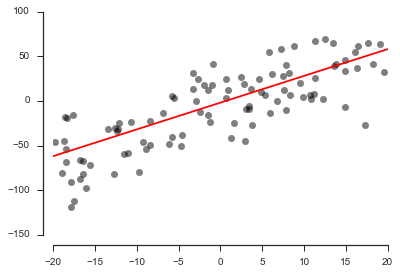

In [18]:
ax = plt.axes()
ax.plot(x, y, 'ko', alpha=0.5)
ax.plot(np.arange(-20, 21, 1), m * np.arange(-20, 21,) + b, 'r-')
ax.set_xlim
sn.despine(offset=10)

In [19]:
distributions['correlation'] = {'function': sim.simulate_correlation,
                                'test': lambda x: scipy.stats.pearsonr(*x),
                                'kwargs': {'slope_lim': [1, 5],
                                           'intercept_lim': [-2, 2],
                                           'sigma_lim': [25, 50],
                                           'count_lim': [60, 100],
                                           'x_lim': [-20, 20]}
                                 }

## Distance Correlation

In [20]:
p, [x, y] = sim.simulate_mantel([1, 5], [-2, 2], [2, 10], [100, 101], x_lim=[-10, 10])

In [21]:
x_prime = pd.DataFrame(x.data, index=x.ids, columns=x.ids)
x_order = x_prime.sort_values('s.1').index

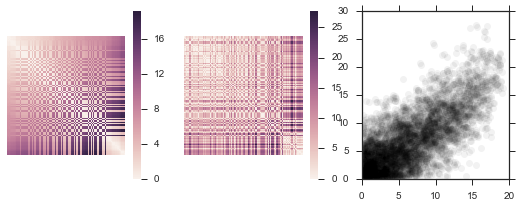

In [22]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)
fig.set_size_inches(9, 3)
sn.heatmap(x.filter(x_order).data, ax=ax1)
sn.heatmap(y.filter(x_order).data, ax=ax2)
ax1.axis('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.axis('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax3.plot(x.condensed_form(), y.condensed_form(), 'ko', alpha=0.05)

In [23]:
def mantel_test(samples):
    """Wraps the scikit-bio mantel test"""
    [x, y] = samples
    return skbio.stats.distance.mantel(x, y, 
                                       method='spearman', 
                                       permutations=999)[1]

In [24]:
distributions['mantel'] = {'function': sim.simulate_mantel,
                           'test': mantel_test,
                           'kwargs': {'slope_lim': [1, 5],
                                      'intercept_lim': [-2, 2],
                                      'sigma_lim': [5, 40],
                                      'count_lim': [60, 100],
                                      'x_lim': [-10, 10],
                                      }
                           }

# Simulates the data

In [25]:
for test_name in distributions.keys():
    # Gets the simulation function, test, and arguments
    simulation, test, kwargs = retrieve_test(test_name)
    if not os.path.exists(os.path.join(sim_location, test_name)):
        os.makedirs(os.path.join(sim_location, test_name))
    distributions[test_name]['p-values'] = []
    # Permforms the simulations
    for i in range(num_rounds):
        file = os.path.join(sim_location, '%s/simulation_%i.p' % (test_name, i))
        params, samples = simulation(**kwargs)
        p = test(samples)
        distributions[test_name]['p-values'].append(p)
        with open(file, 'wb') as f_:
            pickle.dump({'samples': samples, 'params': params, 'p_value': p}, f_)